# Importing libraries

In [1]:
import os

In [2]:
import matplotlib.pyplot as plt
import pandas as pd

In [3]:
df = pd.read_csv('data/time_series.df')
df.head()

,Month/Year,2017,2018,2019,2020,2021,2022,Mean
0,January,NaN,0.28,0.32,0.15,0.62,0.49,0.37
1,February,0.17,0.16,0.42,0.17,0.62,0.63,0.36
2,March,0.34,0.63,0.52,0.25,0.32,0.01,0.35
3,April,0.56,0.50,0.63,0.44,0.35,0.47,0.49
4,May,0.76,0.38,0.87,0.59,0.30,0.73,0.60


### Fill nan values with mean

In [4]:
columns_na = df.loc[:, df.isnull().any()].columns
columns_na

Index(['2017', '2022'], dtype='object')

In [5]:
for col in columns_na:
    df[col].fillna((df[col].mean()), inplace = True)
df = df.round(2)  
df.head()

,Month/Year,2017,2018,2019,2020,2021,2022,Mean
0,January,0.53,0.28,0.32,0.15,0.62,0.49,0.37
1,February,0.17,0.16,0.42,0.17,0.62,0.63,0.36
2,March,0.34,0.63,0.52,0.25,0.32,0.01,0.35
3,April,0.56,0.50,0.63,0.44,0.35,0.47,0.49
4,May,0.76,0.38,0.87,0.59,0.30,0.73,0.60


### Plotting time series data vs months for each year

In [9]:
## creating list for y values
columns = df.columns.tolist()[1:]
columns

['2017', '2018', '2019', '2020', '2021', '2022', 'Mean']

In [14]:
df.iloc[:, 0].head()

0     January
1    February
2       March
3       April
4         May
Name: Month/Year, dtype: object

In [25]:
df.iloc[:,0][0][:3]

'Jan'

In [27]:
## lets shorten the x values name (month)

df.iloc[:,0] = df.iloc[:,0].apply(lambda x :x[:3])
df.head()

,Month/Year,2017,2018,2019,2020,2021,2022,Mean
0,Jan,0.53,0.28,0.32,0.15,0.62,0.49,0.37
1,Feb,0.17,0.16,0.42,0.17,0.62,0.63,0.36
2,Mar,0.34,0.63,0.52,0.25,0.32,0.01,0.35
3,Apr,0.56,0.50,0.63,0.44,0.35,0.47,0.49
4,May,0.76,0.38,0.87,0.59,0.30,0.73,0.60


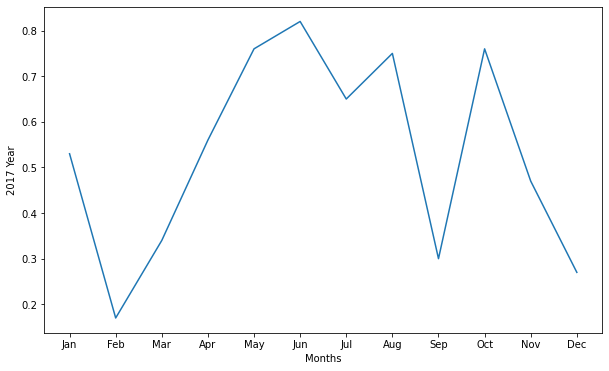

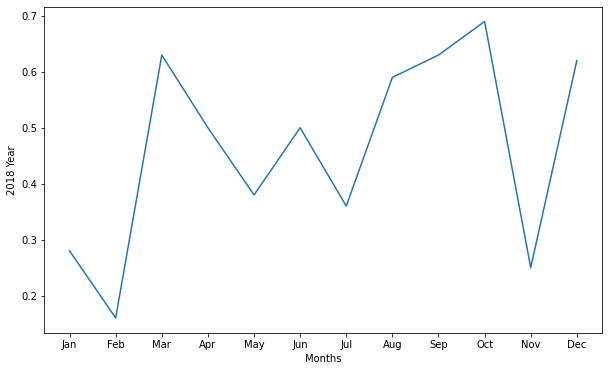

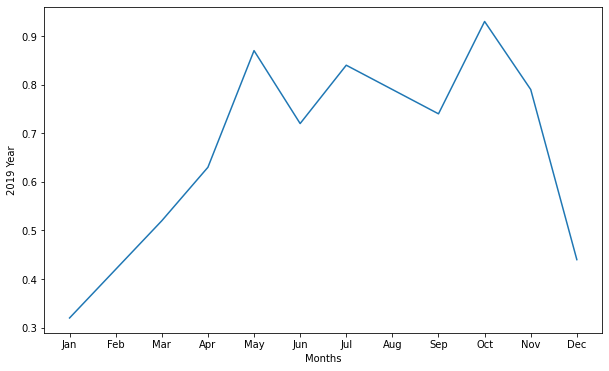

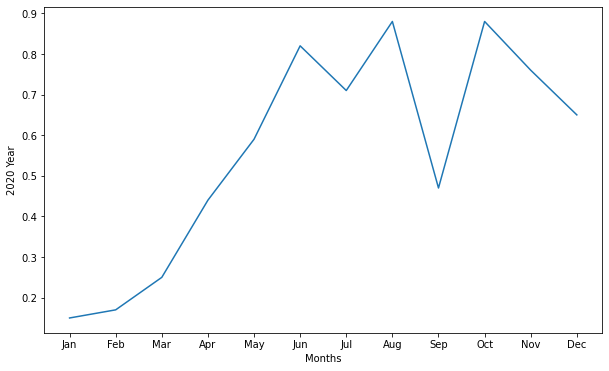

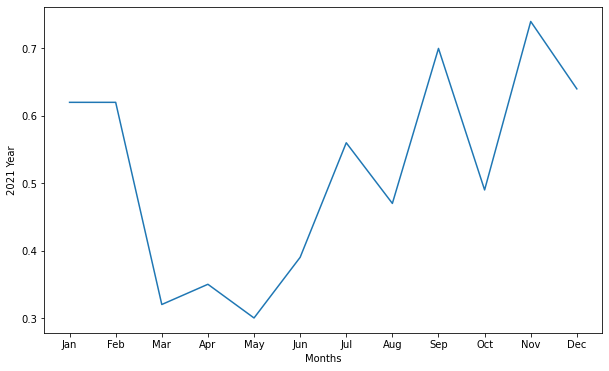

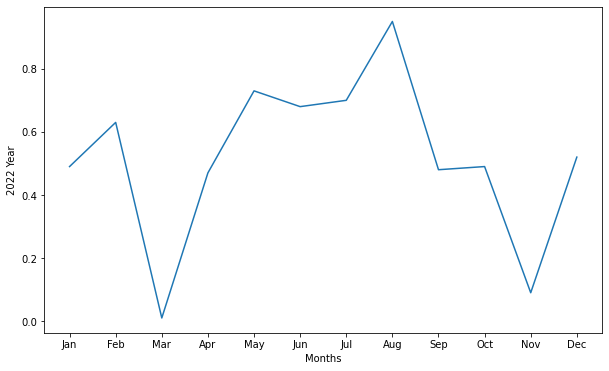

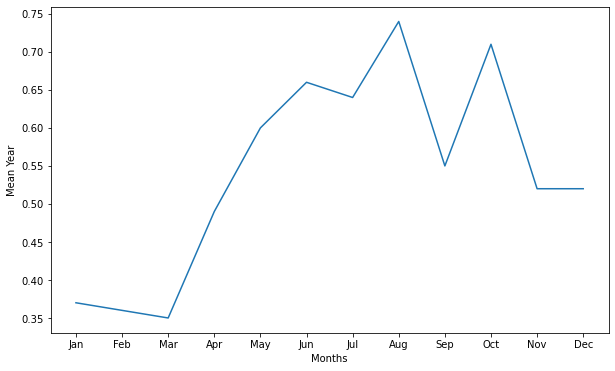

In [32]:
# fig, ax = plt.subplots(figsize=(10, 6),  facecolor='white')

for col in columns:
    fig, ax = plt.subplots(figsize=(10, 6),  facecolor='white')
    ax.plot(df['Month/Year'], df[col])
    plt.xlabel('Months')
    plt.ylabel('Year')